# Text Processing for Accelerator project

A simplified pipeline processing text with FastText.

* Load CPA classification data and removal of unwanted text
* Basic text cleaning
* Vectorize (with FastText)
* examine the vectorization using UMAP on one hand and PCA + TSNE on the other 
* Cluster (HDBSCAN)
* Evaluate
* Visualise

In [1]:
# this bit shouldn't be necessary if we pip install -e .   in the parent directory
%load_ext autoreload
%autoreload 2

In [2]:
import functools
from pprint import pprint
from time import time
from IPython.display import display, HTML
import logging
import pandas as pd
import numpy as np
import plotly.express

In [3]:
import text_processing

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load in the CPA data

In [14]:
CPA = text_processing.fetch_files()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2020-12-02 11:16:12,300 - text_processing - INFO - cleanded CPA File imported
2020-12-02 11:16:12,300 - text_processing - INFO - cleanded CPA File imported


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'data_path' is not defined

In [15]:
CPA[CPA.Includes.notnull()].head()

,Order,Level,Code,Parent,Descr_old,Descr,Includes,Category_2,Category_3,Category_1,Category_0
3,1208795,4,01.11,01.1,"Cereals (except rice), leguminous crops and oi...","Cereals , leguminous crops and oil seeds","cereals, leguminous crops and oil seeds grown ...",01,01.1,A,1
19,1208811,6,01.11.50,01.11.5,Cereals straw and husks,Cereals straw and husks,"unprepared straw, whether or not chopped, grou...",01,01.1,A,1
22,1208814,6,01.11.62,01.11.6,"Peas, green","Peas, green",green peas and forage peas,01,01.1,A,1
24,1208816,5,01.11.7,01.11,Dried leguminous vegetables,Dried leguminous vegetables,"leguminous vegetables, dried, whether or not ...",01,01.1,A,1
56,1208848,6,01.13.19,01.13.1,Other leafy or stem vegetables,Other leafy or stem vegetables,parsley,01,01.1,A,1


In [16]:
CPA1 = CPA[['Code','Descr_old','Descr','Category_0','Category_1','Category_2']].copy()
df = text_processing.clean_col(CPA1, "Descr")
df.drop('Descr',axis=1,inplace=True)

2020-12-02 11:16:18,987 - text_processing - INFO - Cleaning column: Descr 
2020-12-02 11:16:18,987 - text_processing - INFO - Cleaning column: Descr 


In [17]:
df.sample(5)

,Code,Descr_old,Category_0,Category_1,Category_2,Descr_cleaned
2387,26.70.24,Optical measuring and checking devices and ins...,2,C,26,optical measuring checking devices instruments
4849,72.20.43,Experimental development services in other soc...,8,M,72,experimental development services social scien...
2224,26.11.2,Diodes and transistors,2,C,26,diodes transistors
1005,14.19.11,"Babies' garments and clothing accessories, kni...",2,C,14,babies garments clothing accessories knitted c...
3433,38.32.12,Sorted non-metal materials recovery services,2,E,38,sorted non-metal materials recovery services


## Load FastText Pretrained

Note: This requires a fair bit of memory (peaks at about 17.5 GiB)

Recommend shutting down other kernels first, once this has loaded memory usage drops again.

This takes a few minutes to load in.

In [8]:
wv = text_processing.fetch_fasstext_pretrained(filepath="../../data/wiki.en.bin")

2020-12-02 10:16:55,735 - text_processing - INFO - Loading FastText pretrained from ../../data/wiki.en.bin
2020-12-02 10:21:05,940 - text_processing - INFO - Model loaded


## Vectorize descriptions using FastText

In [18]:
text_to_vec = functools.partial(text_processing.vectorize_text, wv)

df["Descr_cleaned_vectorized"] = df.Descr_cleaned.apply(
    text_to_vec
)

### Repeat earlier work on dimensionality reduction using PCA and TSNE

In [42]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X = np.array(list(df["Descr_cleaned_vectorized"]))

pca = PCA(n_components=10)
X_r = pca.fit(X).transform(X)

# reduce dimension with PCA
PCA_df = df.copy()
PCA_df['PCA_X'] = X_r[:,0]
PCA_df['PCA_Y'] = X_r[:,1]

PCA_df['PCA_X'] = X_r[:,0]
PCA_df['PCA_Y'] = X_r[:,1]


# reduce dimension with TSNE
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000, verbose=0)

tsne_data = model.fit_transform(X_r)
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2"))
tsne_df2 = df.copy()
tsne_df2['dim1'] = tsne_data[:,0]
tsne_df2['dim2'] = tsne_data[:,1]
#plot_scat(tsne_df2, Cat_0_descrip,'PCA and TSNE analysis - Scikit vectorisation')


2020-12-02 12:57:23,507 - text_processing - INFO - cleanded CPA File imported
2020-12-02 12:57:23,507 - text_processing - INFO - cleanded CPA File imported
2020-12-02 12:57:23,507 - text_processing - INFO - cleanded CPA File imported
2020-12-02 12:57:23,507 - text_processing - INFO - cleanded CPA File imported
2020-12-02 12:57:23,507 - text_processing - INFO - cleanded CPA File imported
2020-12-02 12:57:23,507 - text_processing - INFO - cleanded CPA File imported
2020-12-02 12:57:23,737 - text_processing - INFO - cleanded CPA File imported
2020-12-02 12:57:23,737 - text_processing - INFO - cleanded CPA File imported
2020-12-02 12:57:23,737 - text_processing - INFO - cleanded CPA File imported
2020-12-02 12:57:23,737 - text_processing - INFO - cleanded CPA File imported
2020-12-02 12:57:23,737 - text_processing - INFO - cleanded CPA File imported
2020-12-02 12:57:23,737 - text_processing - INFO - cleanded CPA File imported


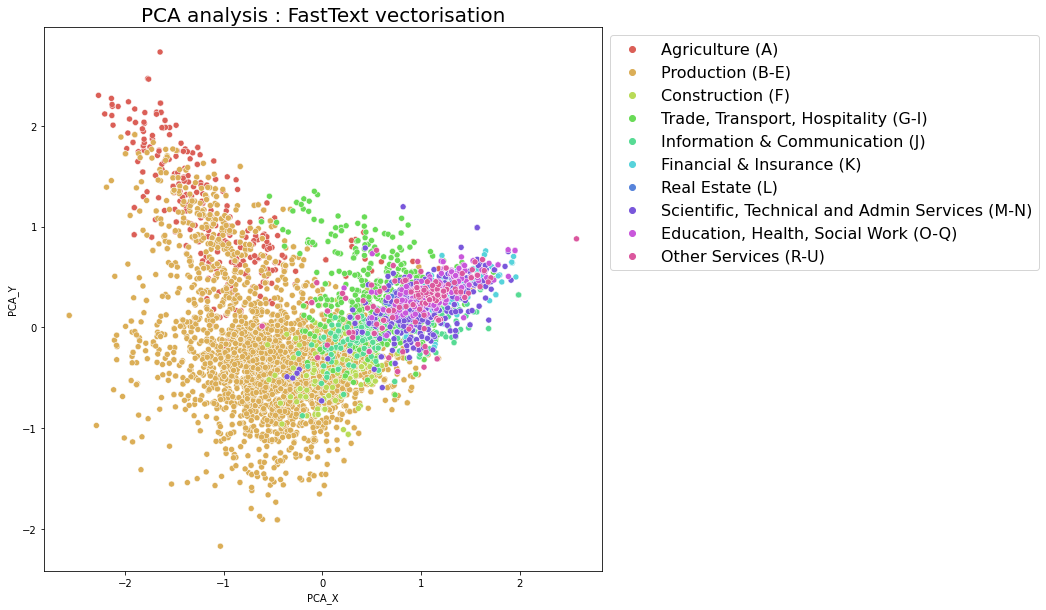

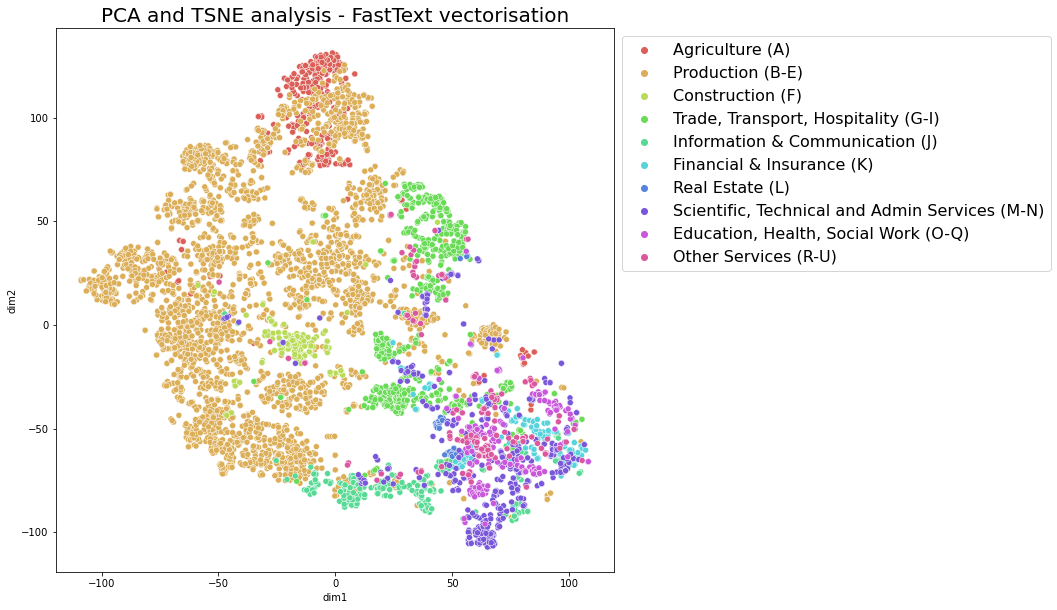

In [43]:
text_processing.plot_scat(PCA_df, '0', 'PCA analysis : FastText vectorisation')
text_processing.plot_scat(tsne_df2, '0', 'PCA and TSNE analysis - FastText vectorisation')

## Dimensionality Reduction - UMAP with 2 dimensions and TSNE to compare what was done before

2020-12-02 13:01:21,211 - text_processing - INFO - Now applying umap to reduce dimension
2020-12-02 13:01:21,211 - text_processing - INFO - Now applying umap to reduce dimension
2020-12-02 13:01:21,211 - text_processing - INFO - Now applying umap to reduce dimension
2020-12-02 13:01:21,211 - text_processing - INFO - Now applying umap to reduce dimension
2020-12-02 13:01:21,211 - text_processing - INFO - Now applying umap to reduce dimension
2020-12-02 13:01:21,211 - text_processing - INFO - Now applying umap to reduce dimension


UMAP(min_dist=0.0, n_neighbors=10, random_state=3052528580, verbose=10)
Construct fuzzy simplicial set
Wed Dec  2 13:01:21 2020 Finding Nearest Neighbors
Wed Dec  2 13:01:21 2020 Building RP forest with 9 trees
Wed Dec  2 13:01:21 2020 NN descent for 12 iterations
	 0  /  12
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	 5  /  12
	 6  /  12
	 7  /  12
	 8  /  12
	 9  /  12
	 10  /  12
Wed Dec  2 13:01:22 2020 Finished Nearest Neighbor Search
Wed Dec  2 13:01:22 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Dec  2 13:01:35 2020 Finished embedding


2020-12-02 13:03:49,815 - text_processing - INFO - cleanded CPA File imported
2020-12-02 13:03:49,815 - text_processing - INFO - cleanded CPA File imported
2020-12-02 13:03:49,815 - text_processing - INFO - cleanded CPA File imported
2020-12-02 13:03:49,815 - text_processing - INFO - cleanded CPA File imported
2020-12-02 13:03:49,815 - text_processing - INFO - cleanded CPA File imported
2020-12-02 13:03:49,815 - text_processing - INFO - cleanded CPA File imported
2020-12-02 13:03:50,077 - text_processing - INFO - cleanded CPA File imported
2020-12-02 13:03:50,077 - text_processing - INFO - cleanded CPA File imported
2020-12-02 13:03:50,077 - text_processing - INFO - cleanded CPA File imported
2020-12-02 13:03:50,077 - text_processing - INFO - cleanded CPA File imported
2020-12-02 13:03:50,077 - text_processing - INFO - cleanded CPA File imported
2020-12-02 13:03:50,077 - text_processing - INFO - cleanded CPA File imported


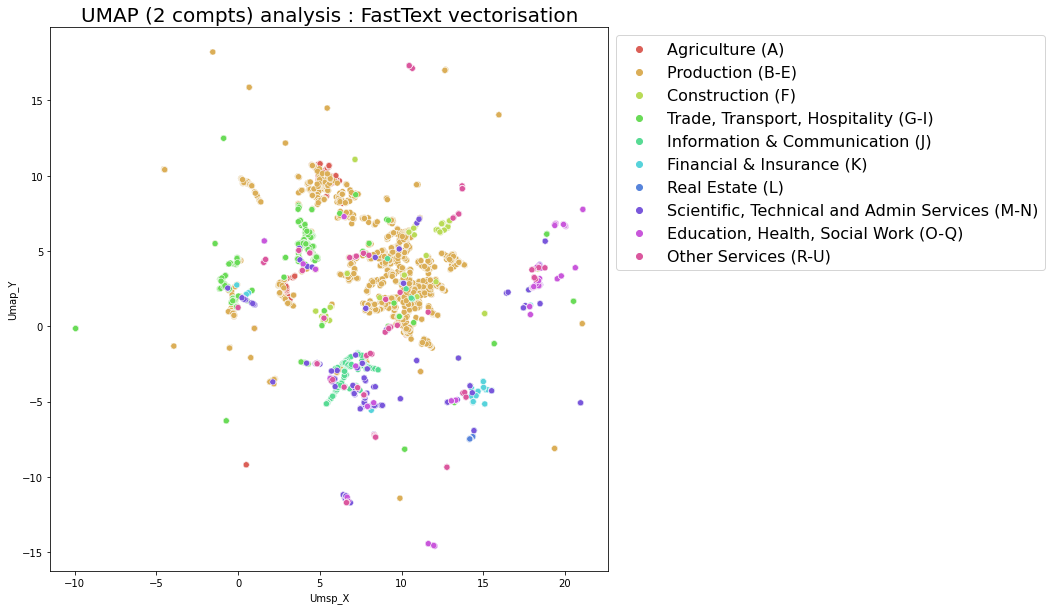

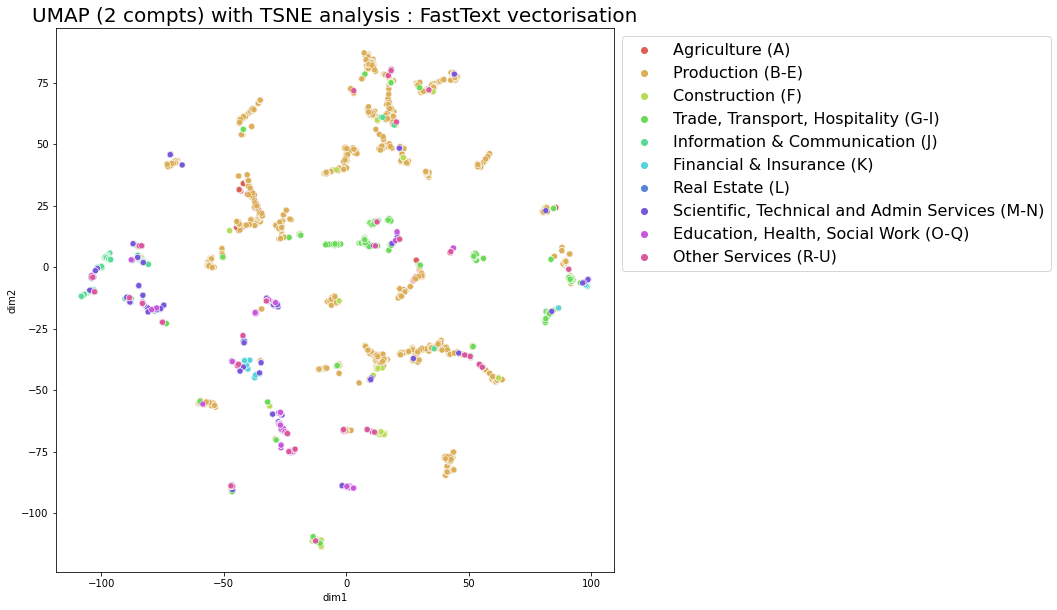

In [45]:
df["Low_dim_2"] = text_processing.reduce_dimensionality(
    df.Descr_cleaned_vectorized, 2
)

X2_r = np.array(list(df.Low_dim_2))
df3 = df.copy()
df3['Umap_X'] = X2_r[:,0]
df3['Umap_Y'] = X2_r[:,1]


tsne_data2 = model.fit_transform(X2_r)
tsne_df_new = pd.DataFrame(data=tsne_data2, columns=("dim1", "dim2"))
tsne_df3 = df.copy()
tsne_df3['dim1'] = tsne_data2[:,0]
tsne_df3['dim2'] = tsne_data2[:,1]

text_processing.plot_scat(df3, '0', 'UMAP (2 compts) analysis : FastText vectorisation')
text_processing.plot_scat(tsne_df3, '0', 'UMAP (2 compts) with TSNE analysis : FastText vectorisation')

In [46]:
text_processing.plot_scat(df3, '1', 'UMAP (2 compts) analysis : FastText vectorisation')
text_processing.plot_scat(tsne_df3, '1', 'UMAP (2 compts) with TSNE analysis : FastText vectorisation')

2020-12-02 13:07:37,930 - text_processing - INFO - cleanded CPA File imported
2020-12-02 13:07:37,930 - text_processing - INFO - cleanded CPA File imported
2020-12-02 13:07:37,930 - text_processing - INFO - cleanded CPA File imported
2020-12-02 13:07:37,930 - text_processing - INFO - cleanded CPA File imported
2020-12-02 13:07:37,930 - text_processing - INFO - cleanded CPA File imported
2020-12-02 13:07:37,930 - text_processing - INFO - cleanded CPA File imported


KeyError: "['Description'] not in index"

## Dimensionality Reduction - UMAP with 10 dimensions 

In [47]:
df["Low_dim_10"] = text_processing.reduce_dimensionality(
    df.Descr_cleaned_vectorized, 10
)



2020-12-02 13:08:18,487 - text_processing - INFO - Now applying umap to reduce dimension
2020-12-02 13:08:18,487 - text_processing - INFO - Now applying umap to reduce dimension
2020-12-02 13:08:18,487 - text_processing - INFO - Now applying umap to reduce dimension
2020-12-02 13:08:18,487 - text_processing - INFO - Now applying umap to reduce dimension
2020-12-02 13:08:18,487 - text_processing - INFO - Now applying umap to reduce dimension
2020-12-02 13:08:18,487 - text_processing - INFO - Now applying umap to reduce dimension


UMAP(min_dist=0.0, n_components=10, n_neighbors=10, random_state=3052528580,
     verbose=10)
Construct fuzzy simplicial set
Wed Dec  2 13:08:18 2020 Finding Nearest Neighbors
Wed Dec  2 13:08:18 2020 Building RP forest with 9 trees
Wed Dec  2 13:08:18 2020 NN descent for 12 iterations
	 0  /  12
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	 5  /  12
	 6  /  12
	 7  /  12
	 8  /  12
	 9  /  12
	 10  /  12
Wed Dec  2 13:08:19 2020 Finished Nearest Neighbor Search
Wed Dec  2 13:08:19 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Dec  2 13:08:37 2020 Finished embedding


In [48]:
# a function to produce a scatter plot
def scat(plot_df, true_cols):
    hover = {
        "Category":False,
        "x": False,
        "y": False
        }
    for col in true_cols:
        hover[col] = True
    fig = plotly.express.scatter(
            plot_df, 
            x="x", 
            y="y", 
            color="Category",
            hover_data=hover)
    return fig
    

In [49]:
plot_df = df[["Category_0","Descr_cleaned", "Code", "Low_dim_10"]].copy()
plot_df['Category'] = plot_df['Category_0'].astype(str)
i=1
plot_df["x"] = plot_df.Descr_cleaned_vectorized_low_dimension.apply(lambda x: x[2*i])
plot_df["y"] = plot_df.Descr_cleaned_vectorized_low_dimension.apply(lambda x: x[2*i+1])

fig1 = scat(plot_df,['Descr_cleaned'])
fig1.update_layout()


AttributeError: 'DataFrame' object has no attribute 'Descr_cleaned_vectorized_low_dimension'

In [ ]:
i=2
plot_df["x"] = plot_df.Descr_cleaned_vectorized_low_dimension.apply(lambda x: x[2*i])
plot_df["y"] = plot_df.Descr_cleaned_vectorized_low_dimension.apply(lambda x: x[2*i+1])
fig2 = scat(plot_df,['Descr_cleaned'])
fig2.update_layout()

In [ ]:
i=3
plot_df["x"] = plot_df.Descr_cleaned_vectorized_low_dimension.apply(lambda x: x[2*i])
plot_df["y"] = plot_df.Descr_cleaned_vectorized_low_dimension.apply(lambda x: x[2*i+1])
fig2 = scat(plot_df,['Descr_cleaned'])
fig2.update_layout()

### Clustering

In [ ]:
df["label"] = text_processing.cluster(df.Descr_cleaned_vectorized_low_dimension)

In [ ]:
plot_df = df[["Category_0","Descr_cleaned", "Code", "Descr_cleaned_vectorized_low_dimension","label"]].copy()

plot_df["x"] = plot_df.Descr_cleaned_vectorized_low_dimension.apply(lambda x: x[0])
plot_df["y"] = plot_df.Descr_cleaned_vectorized_low_dimension.apply(lambda x: x[1])
# add filtering
plot_df = plot_df[plot_df.x >3]

plot_df["Category"] = plot_df.label.astype(str)

fig1 = scat(plot_df, ['Descr_cleaned'])
fig1.update_layout(showlegend=False)

## Investigate the new categories

In [17]:
pd.set_option('display.max_colwidth', None)

In [21]:
lab = 3
cols = ['Code','Descr_old','Descr_cleaned','label','Category_2']
test_case = df[df.label==lab]
display(HTML(f'<h3>These are all the items with label {lab}</h3>'), 
        test_case[cols])

cat = test_case.Category_2.values[0]
tmp = df[df.Category_2 == cat]
display(HTML(f'<h3>These are all the items with category {cat}</h3>'), 
tmp[cols].sort_values(by='label'))

# Now look at the clusters that intersect Category_2
labs = tmp.label.unique()
for l in labs:
    if l >=0 and l!=lab:
        display(HTML(f'<h3>These are all the itms with label {l}</h3>'))
        display(df[df.label==l][cols].sort_values(by='Category_2'))

,Code,Descr_old,Descr_cleaned,label,Category_2
5082,81.30.11,Home garden maintenance,home garden maintenance,3,81
5433,95,Repair services of computers and personal and ...,repair services computers personal household g...,3,95
5445,95.22,Repair services of household appliances and ho...,repair services household appliances home gard...,3,95
5446,95.22.1,Repair services of household appliances and ho...,repair services household appliances home gard...,3,95
5447,95.22.10,Repair services of household appliances and ho...,repair services household appliances home gard...,3,95
5451,95.24,Repair services of furniture and home furnishings,repair services furniture home furnishings,3,95
5452,95.24.1,Repair services of furniture and home furnishings,repair services furniture home furnishings,3,95
5453,95.24.10,Repair services of furniture and home furnishings,repair services furniture home furnishings,3,95


,Code,Descr_old,Descr_cleaned,label,Category_2
5082,81.30.11,Home garden maintenance,home garden maintenance,3,81
5076,81.29.12,Sweeping and snow removal services,sweeping snow removal services,23,81
5075,81.29.11,Disinfecting and exterminating services,disinfecting exterminating services,23,81
5058,81,Services to buildings and landscape,services buildings landscape,90,81
5081,81.30.1,Landscape services,landscape services,90,81
5080,81.30,Landscape services,landscape services,90,81
5079,81.3,Landscape services,landscape services,90,81
5083,81.30.12,Other landscape services,landscape services,90,81
5077,81.29.13,Other sanitation services,sanitation services,168,81
5074,81.29.1,Other cleaning services,cleaning services,198,81


,Code,Descr_old,Descr_cleaned,label,Category_2
4738,71.11,Architectural services,architectural services,90,71
4739,71.11.1,Plans and drawings for architectural purposes,plans drawings architectural purposes,90,71
4740,71.11.10,Plans and drawings for architectural purposes,plans drawings architectural purposes,90,71
4741,71.11.2,Architectural services for buildings,architectural services buildings,90,71
4742,71.11.21,Architectural services for residential buildin...,architectural services residential building pr...,90,71
4743,71.11.22,Architectural services for non-residential bui...,architectural services non-residential buildin...,90,71
4744,71.11.23,Historical restoration architectural services,historical restoration architectural services,90,71
4745,71.11.24,Building project architectural advisory services,building project architectural advisory services,90,71
4750,71.11.4,Landscape architectural services and architect...,landscape architectural services architectural...,90,71
4751,71.11.41,Landscape architectural services,landscape architectural services,90,71


,Code,Descr_old,Descr_cleaned,label,Category_2
4138,52,Warehousing and support services for transport...,warehousing support services transportation,206,52
4196,53.10.14,Post office counter services,post office counter services,206,53
5014,78.30.19,Other human resources provision services for p...,human resources provision services personnel,206,78
5013,78.30.16,Other human resources provision services for m...,human resources provision services medical per...,206,78
5012,78.30.15,Other human resources provision services for h...,human resources provision services hotels rest...,206,78
5011,78.30.14,Other human resources provision services for t...,human resources provision services transport w...,206,78
5010,78.30.13,Other human resources provision services for c...,human resources provision services commercial ...,206,78
5009,78.30.12,Other human resources provision services for o...,human resources provision services office supp...,206,78
5007,78.30.1,Other human resources provision services,human resources provision services,206,78
5006,78.30,Other human resources provision services,human resources provision services,206,78


,Code,Descr_old,Descr_cleaned,label,Category_2
5063,81.2,Cleaning services,cleaning services,198,81
5070,81.22.11,Window cleaning services,window cleaning services,198,81
5071,81.22.12,Specialised cleaning services,specialised cleaning services,198,81
5073,81.29,Other cleaning services,cleaning services,198,81
5074,81.29.1,Other cleaning services,cleaning services,198,81
5078,81.29.19,Other cleaning services n.e.c.,cleaning services,198,81
5469,96.01.11,Coin-operated laundry services,coin-operated laundry services,198,96


,Code,Descr_old,Descr_cleaned,label,Category_2
5064,81.21,General cleaning services of buildings,general cleaning services buildings,199,81
5065,81.21.1,General cleaning services of buildings,general cleaning services buildings,199,81
5066,81.21.11,General home cleaning services,general home cleaning services,199,81
5067,81.21.12,Other general cleaning services of buildings,general cleaning services buildings,199,81
5068,81.22,Other building and industrial cleaning services,building industrial cleaning services,199,81
5069,81.22.1,Industrial cleaning services,industrial cleaning services,199,81


,Code,Descr_old,Descr_cleaned,label,Category_2
2513,27.51.27,Microwave ovens,microwave ovens,304,27
2640,28.21,"Ovens, furnaces and furnace burners",ovens furnaces furnace burners,304,28
2641,28.21.1,Ovens and furnace burners and parts thereof,ovens furnace burners parts thereof,304,28
2643,28.21.12,"Industrial or laboratory furnaces and ovens, n...",industrial laboratory furnaces ovens non-elect...,304,28
2645,28.21.14,"Parts of furnace burners, furnaces and ovens",parts furnace burners furnaces ovens,304,28
2646,28.21.9,Sub-contracted operations as part of manufactu...,sub-contracted operations part manufacturing o...,304,28
2647,28.21.99,Sub-contracted operations as part of manufactu...,sub-contracted operations part manufacturing o...,304,28
3241,33.12.14,"Repair and maintenance services of ovens, furn...",repair maintenance services ovens furnaces fur...,304,33
5072,81.22.13,Furnace and chimney cleaning services,furnace chimney cleaning services,304,81


,Code,Descr_old,Descr_cleaned,label,Category_2
1475,20.20.16,Hazardous pesticides,hazardous pesticides,23,20
3355,37.00.11,Sewage removal and treatment services,sewage removal treatment services,23,37
3356,37.00.12,Treatment services of cesspools and septic tanks,treatment services cesspools septic tanks,23,37
3411,38.21.29,Other non-hazardous waste disposal services,non-hazardous waste disposal services,23,38
3410,38.21.23,Incineration services of non-hazardous waste,incineration services non-hazardous waste,23,38
...,...,...,...,...,...
4066,49.42.19,Other removal services,removal services,23,49
4063,49.42,Removal services,removal services,23,49
4759,71.12.15,Engineering services for waste management proj...,engineering services waste management projects...,23,71
5075,81.29.11,Disinfecting and exterminating services,disinfecting exterminating services,23,81


,Code,Descr_old,Descr_cleaned,label,Category_2
3351,37,Sewerage services; sewage sludge,sewerage services sewage sludge,168,37
3352,37.0,Sewerage services; sewage sludge,sewerage services sewage sludge,168,37
3353,37.00,Sewerage services; sewage sludge,sewerage services sewage sludge,168,37
3354,37.00.1,Sewerage services,sewerage services,168,37
3357,37.00.2,Sewage sludge,sewage sludge,168,37
3358,37.00.20,Sewage sludge,sewage sludge,168,37
5077,81.29.13,Other sanitation services,sanitation services,168,81
3340,E,"WATER SUPPLY; SEWERAGE, WASTE MANAGEMENT AND R...",water supply sewerage waste management remedia...,168,NaN


#### Cluster comparison

In [24]:
text_processing.evaluate(df, "Category_2", "label")

2020-11-16 10:54:13,099 - text_processing - INFO - Are these labellings anything like each other?
2020-11-16 10:54:13,100 - text_processing - INFO - Adjusted rand score: 0.08571486260960455


No, no they are not.

#### Looking at a specific case

In [19]:
wv.most_similar("gru")

[('kgb', 0.6759157776832581),
 ('smersh', 0.5931000709533691),
 ('spetsnaz', 0.5695321559906006),
 ('nkgb', 0.5644126534461975),
 ('counterintelligence', 0.5616932511329651),
 ('rezident', 0.5581782460212708),
 ('nkvd', 0.5543013215065002),
 ('nkvd/nkgb', 0.5516831278800964),
 ('gugb', 0.5502406358718872),
 ('krechetnikov', 0.5455362796783447)]